# H$_6$ ring
## Imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as spla
import scipy.special as sps
from hf_helper import *
from scipy.optimize import line_search as linesearch

## Functions

## Parameters

In [2]:
num_atoms = 6
radius = 4.0 # atomic units
deformation = 0.7500 # ratio (must be less than 1)
num_contracted = 3

if deformation > 1.0 or deformation < 0.0:
        deformation = np.abs(deformation) % 1.0

## Make Geometry

In [3]:
H_ring = make_h_ring(num_atoms, radius, deformation, num_contracted)

In [4]:

for atom in H_ring:
    print(atom)

{'index': 0, 'element': 'H', 'pos': array([2.82842712, 2.82842712, 0.        ]), 'basis': {'num_shells': 1, 'exponents': array([3.42525091, 0.62391373, 0.1688554 ]), 'contraction_coefficients': array([0.15432897, 0.53532814, 0.44463454]), 'norm_const': array([1.79444183, 0.50032649, 0.18773546])}}
{'index': 1, 'element': 'H', 'pos': array([-2.82842712,  2.82842712,  0.        ]), 'basis': {'num_shells': 1, 'exponents': array([3.42525091, 0.62391373, 0.1688554 ]), 'contraction_coefficients': array([0.15432897, 0.53532814, 0.44463454]), 'norm_const': array([1.79444183, 0.50032649, 0.18773546])}}
{'index': 2, 'element': 'H', 'pos': array([-3.86370331,  1.03527618,  0.        ]), 'basis': {'num_shells': 1, 'exponents': array([3.42525091, 0.62391373, 0.1688554 ]), 'contraction_coefficients': array([0.15432897, 0.53532814, 0.44463454]), 'norm_const': array([1.79444183, 0.50032649, 0.18773546])}}
{'index': 3, 'element': 'H', 'pos': array([-1.03527618, -3.86370331,  0.        ]), 'basis': {'nu

<IPython.core.display.Javascript object>


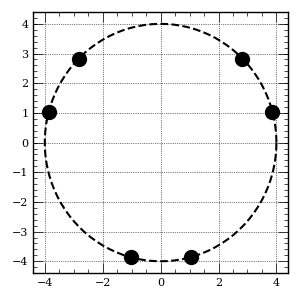

In [6]:
plot_h_ring(num_atoms, radius, deformation, num_contracted)

## Electronic structure functions

In [7]:



# Overlap test
print("Overlap Test")
a = overlap(H_ring)
for i in a:
    for j in i:
        print("{: 6.4f} ".format(j), end="")
    print()

Overlap Test
 1.0000  0.0185  0.0041  0.0014  0.0041  0.4420 
 0.0185  1.0000  0.4420  0.0041  0.0014  0.0041 
 0.0041  0.4420  1.0000  0.0185  0.0041  0.0014 
 0.0014  0.0041  0.0185  1.0000  0.4420  0.0041 
 0.0041  0.0014  0.0041  0.4420  1.0000  0.0185 
 0.4420  0.0041  0.0014  0.0041  0.0185  1.0000 


In [8]:
# kinetic test
print("kinetic Test")
a = kinetic(H_ring)
for i in a:
    for j in i:
        print("{: 6.4f} ".format(j), end="")
    print()

kinetic Test
 0.7600 -0.0067 -0.0023 -0.0010 -0.0023  0.0796 
-0.0067  0.7600  0.0796 -0.0023 -0.0010 -0.0023 
-0.0023  0.0796  0.7600 -0.0067 -0.0023 -0.0010 
-0.0010 -0.0023 -0.0067  0.7600  0.0796 -0.0023 
-0.0023 -0.0010 -0.0023  0.0796  0.7600 -0.0067 
 0.0796 -0.0023 -0.0010 -0.0023 -0.0067  0.7600 


In [9]:
# nuclear test
print("nuclear Test")
a = nuclear(H_ring)
for i in a:
    for j in i:
        print("{: 6.4f} ".format(j), end="")
    print()

nuclear Test
-2.2943 -0.0288 -0.0064 -0.0022 -0.0064 -0.9396 
-0.0288 -2.2943 -0.9396 -0.0064 -0.0022 -0.0064 
-0.0064 -0.9396 -2.2943 -0.0288 -0.0064 -0.0022 
-0.0022 -0.0064 -0.0288 -2.2943 -0.9396 -0.0064 
-0.0064 -0.0022 -0.0064 -0.9396 -2.2943 -0.0288 
-0.9396 -0.0064 -0.0022 -0.0064 -0.0288 -2.2943 


In [10]:
two_electron(H_ring)

array([[[[7.74605930e-01, 6.64677222e-03, 1.20272155e-03,
          3.72405727e-04, 1.20272155e-03, 2.67344470e-01],
         [6.64677222e-03, 1.76766420e-01, 7.08594066e-02,
          6.92022828e-04, 2.78667171e-04, 1.50505882e-03],
         [1.20272155e-03, 7.08594066e-02, 1.44337200e-01,
          2.71312854e-03, 6.69750506e-04, 4.15622850e-04],
         [3.72405727e-04, 6.92022828e-04, 2.71312854e-03,
          1.29409482e-01, 6.07644642e-02, 9.22134486e-04],
         [1.20272155e-03, 2.78667171e-04, 6.69750506e-04,
          6.07644642e-02, 1.44337200e-01, 4.46433772e-03],
         [2.67344470e-01, 1.50505882e-03, 4.15622850e-04,
          9.22134486e-04, 4.46433772e-03, 4.48000679e-01]],

        [[6.64677222e-03, 1.58354378e-04, 3.22985904e-05,
          7.10612470e-06, 1.89826282e-05, 2.42799070e-03],
         [1.58354378e-04, 6.64677222e-03, 2.42799070e-03,
          1.89826282e-05, 7.10612470e-06, 3.22985904e-05],
         [3.22985904e-05, 2.42799070e-03, 4.46433772e-03,
    

In [11]:
nuclear_repulsion_energy(H_ring)

3.233472796761734

In [12]:
RHF(H_ring)

-3.113227163080535

In [18]:
def optimize_H6_ring(radius, deformation):
    num_contracted = 3
    num_atoms = 6
    
    initial_guess = np.array((radius, deformation))  # initial guess
    #convergence criteria
    residual_tolerance = 1e-3  
    update_tolerance = 1e-5
    IT_MAX = 20
    old_guess = initial_guess
    approx_hessian = np.identity(2)
    inverse_approx_hessian = np.identity(2)
    num_steps = 0

    s_i = np.array([1.0, 0.0])
    y_i = np.array([0.0, 1.0])

    converged = False
    steps_radius = []
    steps_deformation = []
    steps_energy = []
    steps_energy.append(HF_energy(old_guess))
    steps_radius.append(old_guess[0])
    steps_deformation.append(old_guess[1])
    
    while not converged and num_steps <= IT_MAX:
        num_steps += 1
        new_search_direction = np.dot(inverse_approx_hessian, -HF_gradient(old_guess))
        try:
            s_i = linesearch(HF_energy, HF_gradient, old_guess, new_search_direction)[
                0] * new_search_direction
        except:
            print("WARNING: HESSIAN IS NOT POSITIVE DEFINITE... RESETTING SEARCH DIRECTION TO STEEPEST DESCENT!")
            new_search_direction = -HF_gradient(old_guess)
            s_i = linesearch(HF_energy, HF_gradient, old_guess, new_search_direction)[0] * new_search_direction

        new_guess = old_guess + s_i
        if new_guess[1] > 1.0 or new_guess[1] < 0.5:
            new_guess[1] = 1.0 - (np.abs(new_guess[1]) % 0.5)
        y_i = HF_gradient(new_guess) - HF_gradient(old_guess)
        approx_hessian += ((np.outer(y_i, y_i)) / (np.dot(y_i, s_i))) - ((np.dot(approx_hessian,
                                                                                 np.dot(np.outer(s_i, s_i), approx_hessian))) / (np.dot(s_i, np.dot(approx_hessian, s_i))))
        # update using Sherman-Morrison formula
        part_A = np.dot(s_i, y_i)
        part_A += np.dot(y_i, np.dot(inverse_approx_hessian, y_i))
        part_A /= np.dot(s_i, y_i)**2
        part_A *= np.outer(s_i, s_i)
        part_B = np.dot(inverse_approx_hessian, np.outer(y_i, s_i))
        part_B += np.dot(np.outer(s_i, y_i), inverse_approx_hessian)
        part_B /= np.dot(s_i, y_i)
        inverse_approx_hessian += part_A - part_B

        diff = old_guess - new_guess
        diff = np.sqrt(np.dot(diff, diff))
        print ("OLD GUESS: {}".format(old_guess))
        print ("NEW GUESS: {}".format(new_guess))
        print ("DIFFERENCE: {}".format(diff))
        old_guess = new_guess
        old_search_direction = new_search_direction
        steps_radius.append(old_guess[0])
        steps_deformation.append(old_guess[1])
        steps_energy.append(HF_energy(old_guess))
        if(diff < residual_tolerance):
            converged = True
    steps_radius = np.array(steps_radius)
    steps_deformation = np.array(steps_deformation)
    steps_energy = np.array(steps_energy)
    return steps_radius, steps_deformation, steps_energy

# DIMERS   
# radius = 4.5 # atomic units
# deformation = 0.65 # ratio (must be less than or equal to 1)
# RING
radius = 2.0 # atomic units
deformation = 1.0 # ratio (must be less than or equal to 1)


# use BFGS to optimize
steps_radius, steps_deformation, steps_energy = optimize_H6_ring(radius, deformation)
        




OLD GUESS: [2. 1.]
NEW GUESS: [1.80003882 1.        ]
DIFFERENCE: 0.1999611752432351
OLD GUESS: [1.80003882 1.        ]
NEW GUESS: [1.82101927 1.        ]
DIFFERENCE: 0.02098044357797879
OLD GUESS: [1.82101927 1.        ]
NEW GUESS: [1.81686686 1.        ]
DIFFERENCE: 0.0041524115463960065
OLD GUESS: [1.81686686 1.        ]
NEW GUESS: [1.81677424 1.        ]
DIFFERENCE: 9.26190903791646e-05


In [19]:
fig = plt.figure(facecolor='white',figsize=(3,3))
ax = fig.add_subplot(111)
fig.set_tight_layout(True)
plt.plot(range(len(steps_radius)),steps_radius)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


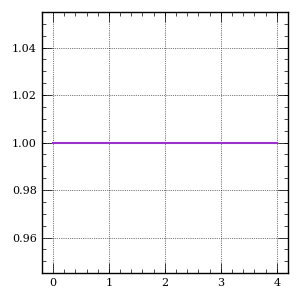

In [20]:
fig = plt.figure(facecolor='white',figsize=(3,3))
ax = fig.add_subplot(111)
fig.set_tight_layout(True)
plt.plot(range(len(steps_deformation)),steps_deformation)
plt.show()

In [21]:
fig = plt.figure(facecolor='white',figsize=(3,3))
ax = fig.add_subplot(111)
fig.set_tight_layout(True)
plt.plot(range(len(steps_energy)),steps_energy)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


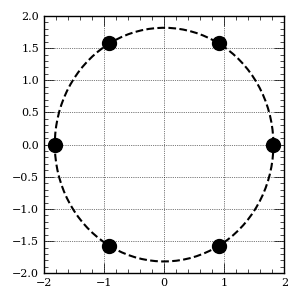

In [22]:
plot_h_ring(6, steps_radius[-1], steps_deformation[-1], 3)